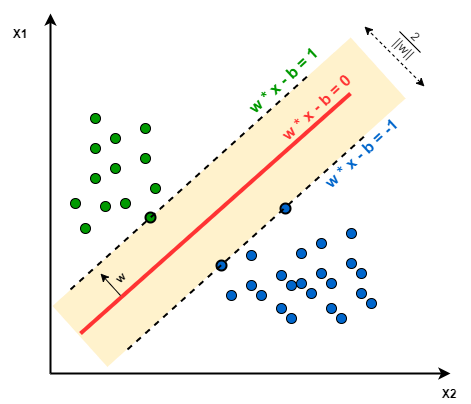

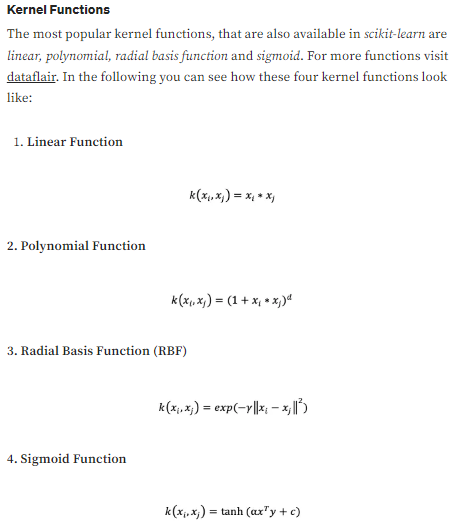

https://data-flair.training/blogs/svm-kernel-functions/

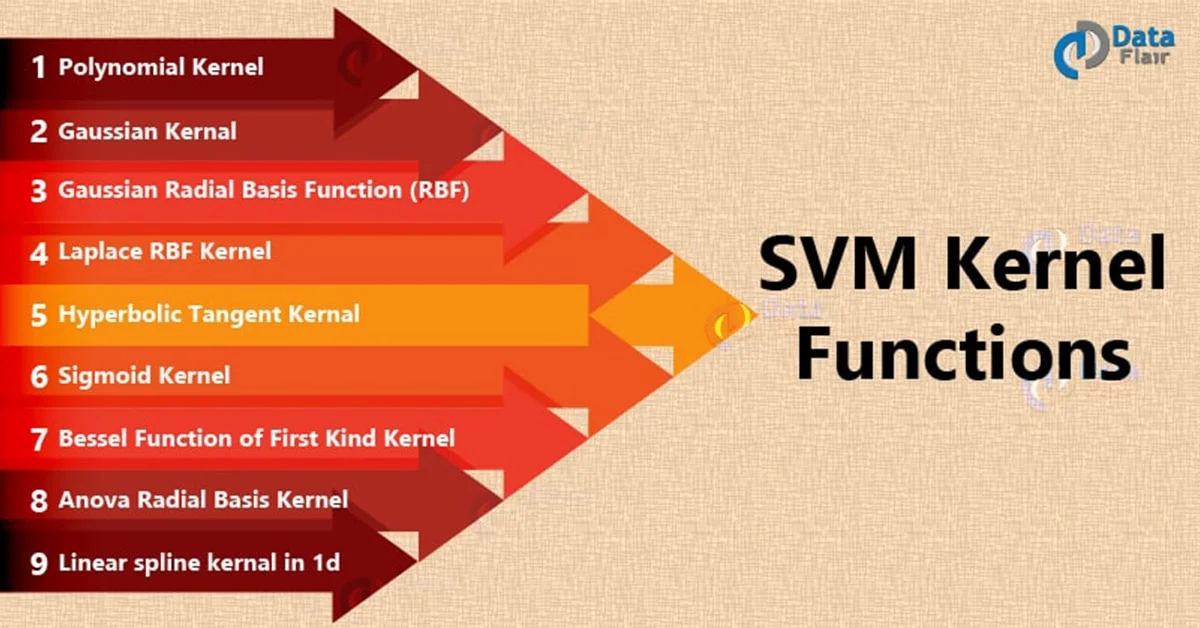

### **In its most simple type, SVM doesn’t support multiclass classification natively. It supports binary classification and separating data points into two classes. For multiclass classification, the same principle is utilized after breaking down the multiclassification problem into multiple binary classification problems.**

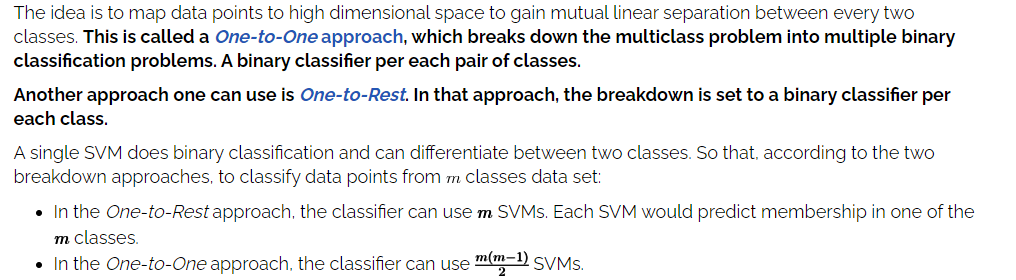

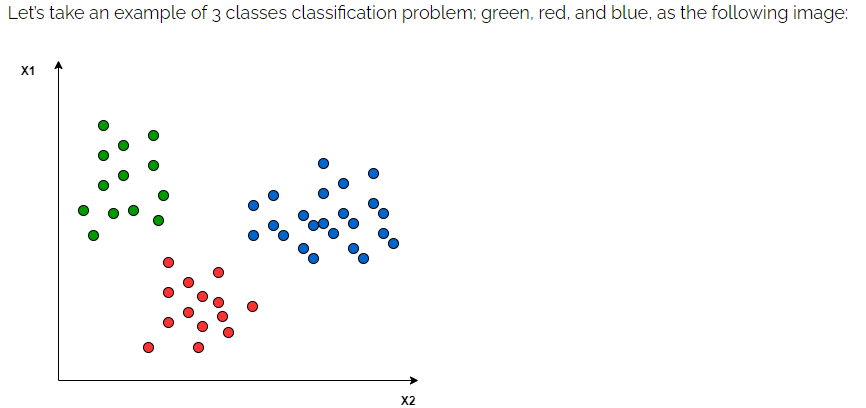

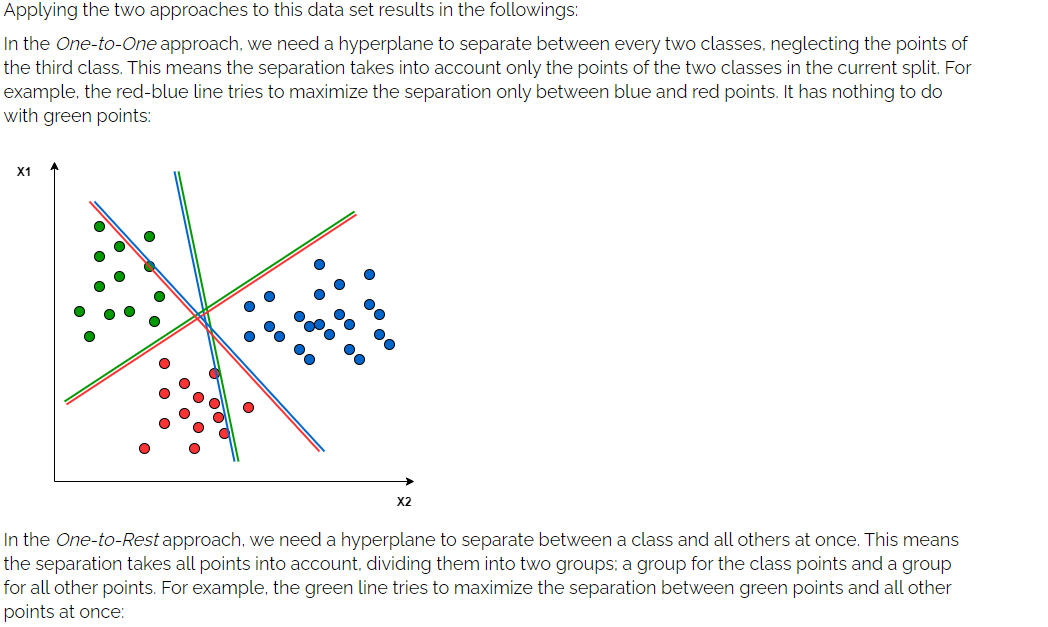

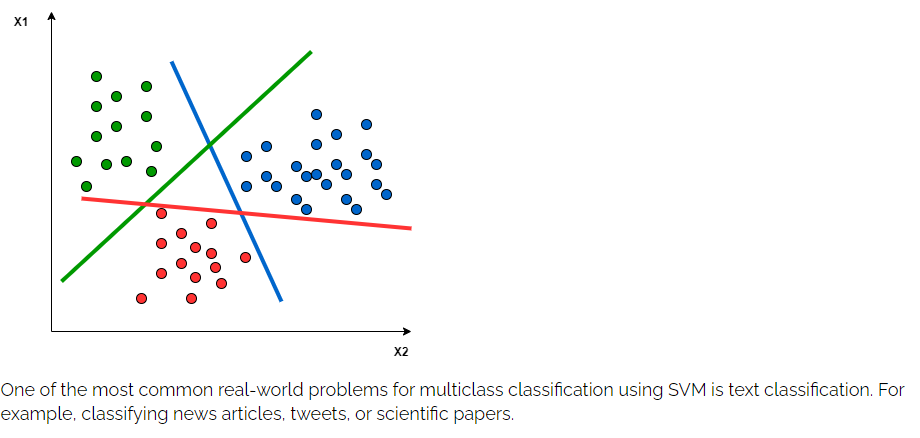

The following Python code shows an implementation for building (training and testing) a multiclass classifier (3 classes), using Python and Scikitlean library.

###  We developed two different classifiers to show the usage of two different kernel functions; Polynomial and RBF. The code also calculates the accuracy and f1 scores to show the performance difference between the two selected kernel functions on the same data set.

In this code, we use the Iris flower data set. That data set contains three classes of 50 instances each, where each class refers to a type of Iris plant.

### Use of SVM with 2 different kernels

In [16]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [17]:
iris = datasets.load_iris()

In [18]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

#### We’ll create two objects from SVM, to create two different classifiers; one with Polynomial kernel, and another one with RBF kernel:

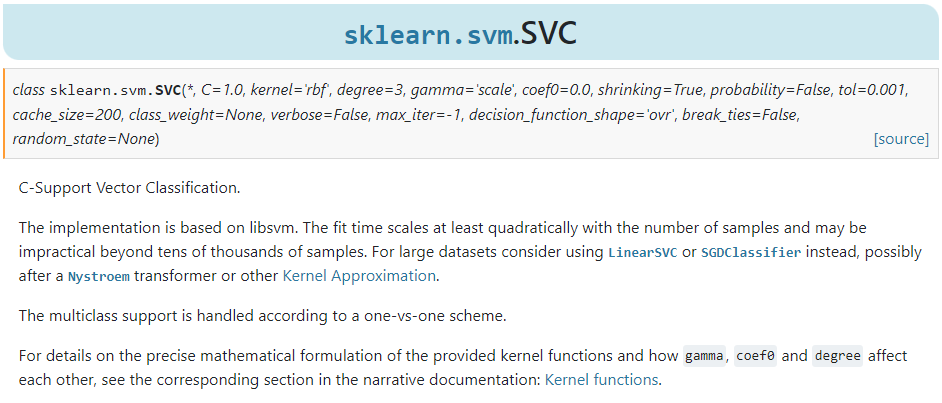

In [19]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [20]:
# To calculate the efficiency of the two models, we’ll test the two classifiers using the test data set:

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

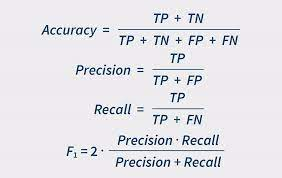

In [21]:
# Finally, we’ll calculate the accuracy and f1 scores for SVM with Polynomial kernel:

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  70.00
F1 (Polynomial Kernel):  69.67


In [22]:
# In the same way, the accuracy and f1 scores for SVM with RBF kernel:

rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  76.67
F1 (RBF Kernel):  76.36


For the accuracy score, it shows the percentage of the true positive and true negative to all data points. So, it’s useful when the data set is balanced.

For the f1 score, it calculates the harmonic mean between precision and recall, and both depend on the false positive and false negative. So, it’s useful to calculate the f1 score when the data set isn’t balanced.

Playing around with SVM hyperparameters, like C, gamma, and degree in the previous code snippet will display different results. As we can see, in this problem, SVM with RBF kernel function is outperforming SVM with Polynomial kernel function.

For the f1 score, it calculates the harmonic mean between precision and recall, and both depend on the false positive and false negative.

### Three Classes SVM

In [23]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import cross_validate, train_test_split
import pandas as pd
from scipy.io import loadmat, savemat
import time
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
# Load the dataset file
ThreeClassTrainingData = loadmat('ThreeClassTrainingData.mat') # mat Matlab file
ThreeClassTestData = loadmat('ThreeClassTestData.mat') # mat Matlab file

# Training and Test Dataset
X_train = ThreeClassTrainingData['X_train']
y_train = ThreeClassTrainingData['y_train']

X_test = ThreeClassTestData['X_test']
y_test = ThreeClassTestData['y_test']

In [25]:
ThreeClassTrainingData

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Dec 11 16:55:25 2019',
 '__version__': '1.0',
 '__globals__': [],
 'X_train': array([[-1.72814169,  0.22814542],
        [-2.04895361,  0.05663025],
        [-1.86942274,  0.03219218],
        ...,
        [ 1.50479759,  1.01079821],
        [ 1.50350024,  1.20612829],
        [ 1.07420726,  1.22174618]]),
 'y_train': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],


In [26]:
ThreeClassTestData

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Dec 11 16:56:51 2019',
 '__version__': '1.0',
 '__globals__': [],
 'X_test': array([[-1.30142312,  0.19564397],
        [-1.71424881,  0.04552747],
        [-2.08352342, -0.01979021],
        [-0.96112319, -0.03921752],
        [-1.72687421,  0.0334348 ],
        [-2.53683405,  0.37764944],
        [-0.93465065, -0.48717598],
        [-2.15469751,  0.19889333],
        [-1.3901848 , -0.09048953],
        [-1.21207162, -0.11685101],
        [-0.90173999, -0.05468702],
        [-1.231996  , -0.18447039],
        [-1.81466227,  0.10035651],
        [-1.57514717, -0.06575971],
        [-1.63047024, -0.05792324],
        [-1.53031113, -0.10708424],
        [-1.2876297 , -0.23029986],
        [-1.83891846,  0.10214876],
        [-2.17625257,  0.01911206],
        [-1.92718971, -0.00949005],
        [-2.10665077,  0.19746411],
        [-1.59173295,  0.23234444],
        [-1.10426289, -0.03965689],
        [-1.16754894, -0.2

In [27]:
# Prepare the training data set for One-against-All

# Split the data set into training as three sets of classes : (1&(2,3), 2&(1,3) and 3&(1,2)) and create a vertical 
# a stack (vstack) data

X_train1 = np.vstack((X_train[:240,:], X_train[240:480,:], X_train[480:,:]))
X_train2 = np.vstack((X_train[240:480,:], X_train[:240,:], X_train[480:,:]))
X_train3 = np.vstack((X_train[480:,:], X_train[:240,:], X_train[240:480,:]))

y_train_mod = np.vstack((np.full((240,1), -1), np.ones((480,1))))

In [28]:
# Prepare the training data set for One-against-One

## For One-against-One ##
# Split the data set into training as th three sets of classes : (1&2, 2&3 and 1&3)
X_train12 = np.vstack((X_train[:240,:], X_train[240:480,:]))
X_train23 = np.vstack((X_train[240:480,:], X_train[480:,:]))
X_train13 = np.vstack((X_train[:240,:], X_train[480:,:]))

y_train12 = np.sign(np.vstack((y_train[:240,:], y_train[240:480,:])) - 1.5*np.ones((480,1)))
y_train23 = np.sign(np.vstack((y_train[240:480,:], y_train[480:,:])) - 2.5*np.ones((480,1)))
y_train13 = np.sign(np.vstack((y_train[:240,:], y_train[480:,:])) - 2*np.ones((480,1)))

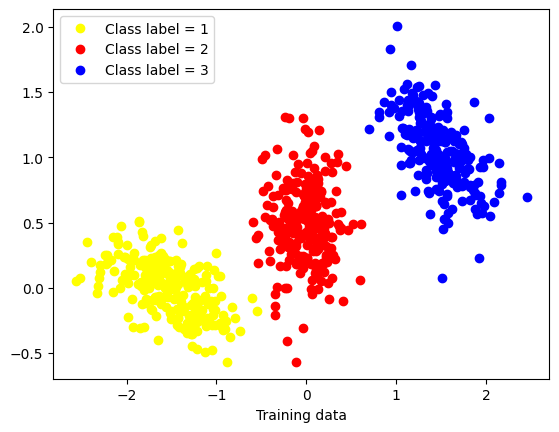

In [29]:
plt.plot(X_train[:240,0], X_train[:240,1], 'o', label='Class label = 1', color='yellow')
plt.plot(X_train[240:480,0], X_train[240:480,1], 'o', label='Class label = 2', color='red')
plt.plot(X_train[480:,0], X_train[480:,1], 'o', label='Class label = 3', color='blue')
plt.xlabel("Training data")
plt.legend(numpoints=1)

### Create and train the SVM models for One-against-All method

In [30]:
# For Class 1 and (2,3)
svm1 = svm.SVC(kernel='linear')
svm1.fit(X_train1, y_train_mod)

# For Class 2 and (1,3)
svm2 = svm.SVC(kernel='linear')
svm2.fit(X_train2, y_train_mod)

# For Class 3 and (1,2)
svm3 = svm.SVC(kernel='linear')
svm3.fit(X_train3, y_train_mod)

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

1. Import the necessary libraries:

It appears that the code is using the SVM module from the svm library. This module likely contains the SVM implementation. Additionally, it seems to use the time library to measure the time taken for training.

2. Start Measuring Training Time:

The time.time() function is called to record the current time in start_train_time_ova. This is done before starting the training of the SVM models to measure how much time the training process takes.

3.Create and Train SVM Models:

The code creates and trains three SVM models, each one used for distinguishing one class from the rest (One-against-All). In this case, there seem to be three classes (Class 1, Class 2, and Class 3). Here's what each SVM model is doing:

svm1 is trained to distinguish Class 1 from the combination of Classes 2 and 3.
svm2 is trained to distinguish Class 2 from the combination of Classes 1 and 3.
svm3 is trained to distinguish Class 3 from the combination of Classes 1 and 2.
The choice of a linear kernel is made for each SVM model. A linear kernel is appropriate for problems where the classes can be separated by linear decision boundaries.

X_train1, X_train2, and X_train3 seem to be training data for classes 1, 2, and 3, respectively, and y_train_mod appears to be the corresponding target labels.

4. Measure the End of Training Time:

After training the SVM models, the time.time() function is called again to record the current time in end_train_time_ova. This marks the end of the training process.

5. Calculate Total Training Time:

The code calculates the total time taken for training by subtracting start_train_time_ova from end_train_time_ova. The result is stored in total_train_time_ova.

### Create and train the SVM models for One-against-One method

In [31]:
# For Class 1 and 2
svm4 = svm.SVC(kernel='linear')
svm4.fit(X_train12, y_train12)

# For Class 2 and 3
svm5 = svm.SVC(kernel='linear')
svm5.fit(X_train23, y_train23)

# For Class 1 and 3
svm6 = svm.SVC(kernel='linear')
svm6.fit(X_train13, y_train13)

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [32]:
# Test the test data set and compare the predicted outputs with the given test labels and find the error rate


y_test_hat_ova = np.zeros((y_test.shape))

for i in range(y_test_hat_ova.shape[0]):
    
    # Predicition for 1 and (2,3)
    y_test_hat_1 = svm1.predict(X_test[i:i+1])
    
    # Predicition for 2 and (1,3)
    y_test_hat_2 = svm2.predict(X_test[i:i+1])
    
    # Predicition for 3 and (1,2)
    y_test_hat_3 = svm3.predict(X_test[i:i+1])
    
    
    if (y_test_hat_1 == -1) and (y_test_hat_2 == 1) and (y_test_hat_3 == 1):
        y_test_hat_ova[i,0] = 1
        
    elif (y_test_hat_1 == 1) and (y_test_hat_2 == -1) and (y_test_hat_3 == 1):
        y_test_hat_ova[i,0] = 2
        
    elif (y_test_hat_1 == 1) and (y_test_hat_2 == 1 and (y_test_hat_3 == -1)):
        y_test_hat_ova[i,0] = 3
        
error_vec_ova = [0 if i[0]==i[1] else 1 for i in np.hstack((y_test_hat_ova, y_test))]

error_rate_ova = sum(error_vec_ova)/y_test_hat_ova.shape[0]

print("Number of errors are: " + str(sum(error_vec_ova)) + " and error_rate is: " + str(error_rate_ova))

Number of errors are: 61 and error_rate is: 0.3388888888888889


In [33]:
# Test the test data set and compare the predicted outputs with the given test labels and find the error rate

y_test_hat_ovo = np.zeros((y_test.shape))

for i in range(y_test_hat_ovo.shape[0]):
    
    # Predicition for 1 and 2
    y_test_hat_1 = svm4.predict(X_test[i:i+1])
    
    # Predicition for 2 and 3
    y_test_hat_2 = svm5.predict(X_test[i:i+1])
    
    # Predicition for 1 and 3
    y_test_hat_3 = svm6.predict(X_test[i:i+1])
    
    if (y_test_hat_1 == -1) and (y_test_hat_3 == -1):
        y_test_hat_ovo[i,0] = 1
        
    elif (y_test_hat_1 == 1) and (y_test_hat_2 == -1):
        y_test_hat_ovo[i,0] = 2
        
    elif (y_test_hat_2 == 1) and (y_test_hat_3 == 1):
        y_test_hat_ovo[i,0] = 3

error_vec_ovo = [0 if i[0]==i[1] else 1 for i in np.hstack((y_test_hat_ovo, y_test))]

error_rate_ovo = sum(error_vec_ovo)/y_test_hat_ovo.shape[0]

print("Number of errors are: " + str(sum(error_vec_ovo)) + " and error_rate is: " + str(error_rate_ovo))

Number of errors are: 1 and error_rate is: 0.005555555555555556


In [34]:
################################################################################################################################

### Example of converting mat (matlab file) to CSV

In [35]:
import pandas as pd

In [37]:
from scipy.io import loadmat

# Load the .mat file
Training = loadmat(r"ThreeClassTrainingData.mat")

In [38]:
print(Training.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X_train', 'y_train'])


In [39]:
x=Training["X_train"]

In [40]:
df_Training=pd.DataFrame(x)

In [41]:
df_Training

,0,1
0,-1.728142,0.228145
1,-2.048954,0.056630
2,-1.869423,0.032192
3,-1.979911,-0.220293
4,-1.678271,-0.219524
...,...,...
715,1.145052,1.403069
716,1.192561,1.476961
717,1.504798,1.010798
718,1.503500,1.206128


In [42]:

df_Training.to_csv(r"Amin.csv", index=False)

In [43]:
df_Training # check csv file for index

,0,1
0,-1.728142,0.228145
1,-2.048954,0.056630
2,-1.869423,0.032192
3,-1.979911,-0.220293
4,-1.678271,-0.219524
...,...,...
715,1.145052,1.403069
716,1.192561,1.476961
717,1.504798,1.010798
718,1.503500,1.206128
